In [33]:
import pandas as pd
from surprise import Dataset, SVD, Reader, NormalPredictor, accuracy
from surprise.model_selection import cross_validate, KFold, GridSearchCV

In [22]:
ratings_df = pd.read_csv('../data/ratings.csv')
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [23]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [25]:
ratings_df['movieId'].nunique()

9724

In [5]:
ratings_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

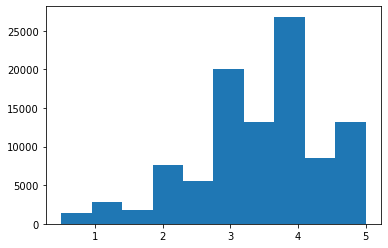

In [6]:
import matplotlib.pyplot as plot

plot.hist(ratings_df['rating'])

In [27]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[["userId", "movieId", "rating"]], reader)

cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([1.42139872, 1.42317235]),
 'test_mae': array([1.13584819, 1.13734251]),
 'fit_time': (0.043324947357177734, 0.04412269592285156),
 'test_time': (0.2562422752380371, 0.23598003387451172)}

In [31]:
kf = KFold(n_splits=5)
svd = SVD()

for train, test in kf.split(data):
    svd.fit(train)
    preds = svd.test(test)

    accuracy.rmse(preds, verbose=True)

RMSE: 0.8845
RMSE: 0.8656
RMSE: 0.8708
RMSE: 0.8741
RMSE: 0.8744


In [37]:
grid = {"n_epochs": [5, 10, 20, 25], "lr_all": [0.002, 0.005, .008], "reg_all": [0.2, 0.4, 0.6]}
gs = GridSearchCV(SVD, grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

0.8732400416147487
{'n_epochs': 25, 'lr_all': 0.008, 'reg_all': 0.2}


In [48]:
svd.predict(456, 2000)

Prediction(uid=456, iid=2000, r_ui=None, est=4.244760026927211, details={'was_impossible': False})

In [45]:
svd.predict(601, 2000)

Prediction(uid=601, iid=2000, r_ui=None, est=4.082237403629636, details={'was_impossible': False})

In [7]:
movies_df = pd.read_csv('../data/movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [47]:
movies_df.loc[movies_df['movieId'] == 2000]

,movieId,title,genres
1475,2000,Lethal Weapon (1987),Action|Comedy|Crime|Drama


In [14]:
#from surprise import SVD
#from surprise.model_selection import cross_validate
#from sklearn.model_selection import train_test_split

#svd = SVD()

#X = ratings_df.drop('rating', axis=1)
#y = ratings_df['rating']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [15]:
import surprise
from surprise.prediction_algorithms import *
import pandas as pd
import numpy as np
import datetime as dt

1. Drop nulls
2. join/concatenate all the csv's together, based on different Id types
3. OneHotEncode() across all genres to create features/separation??
4. Can we work with the tag data at all? Some NLP??
5. Do we need to work with the ordinal ratings in a particular way??

In [50]:
train1, test1 = surprise.model_selection.train_test_split(data, random_state=42)

In [51]:
svd.fit(train1)
preds1 = svd.test(test1)

accuracy.rmse(preds, verbose=True)

RMSE: 0.8744


0.8744154926796404